In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

# Simulate some AR models 

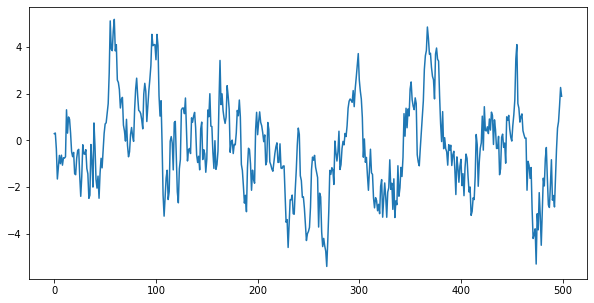

In [3]:
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
ar1 = np.array([1, -0.9, 0])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=500)
plt.plot(simulated_data_1);


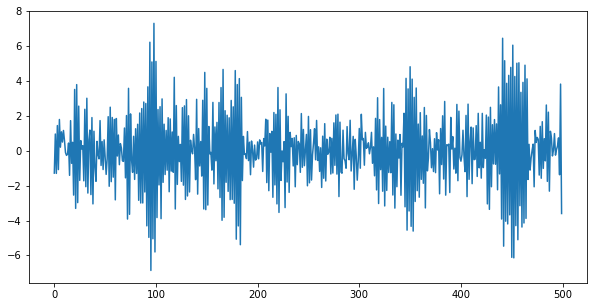

In [4]:
# Plot 2: AR parameter = -0.9
ar2 = np.array([1, 0.9, 0])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=500)
plt.plot(simulated_data_2);

# Compute the Autocorrelation and Partial Autocorrelation function (Correlogram)

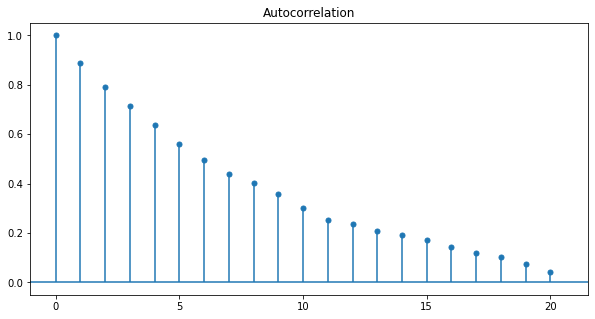

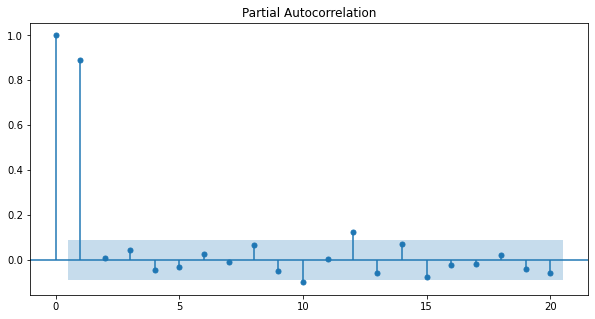

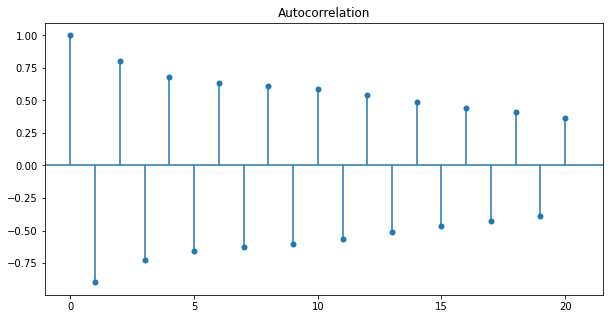

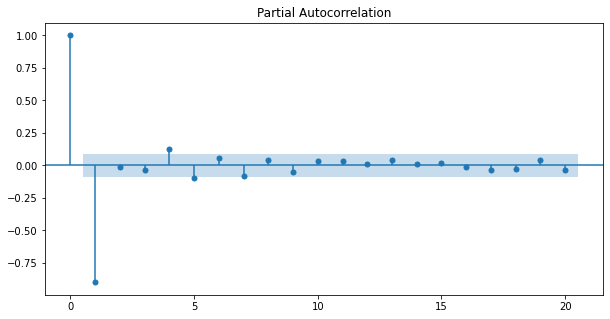

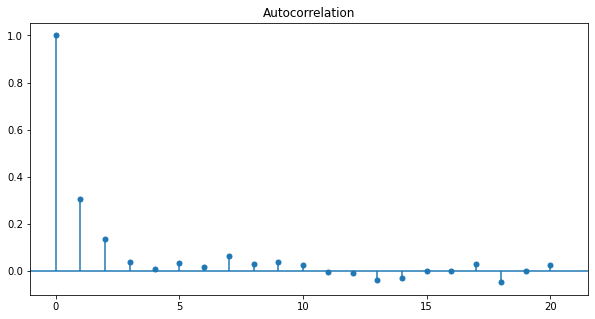

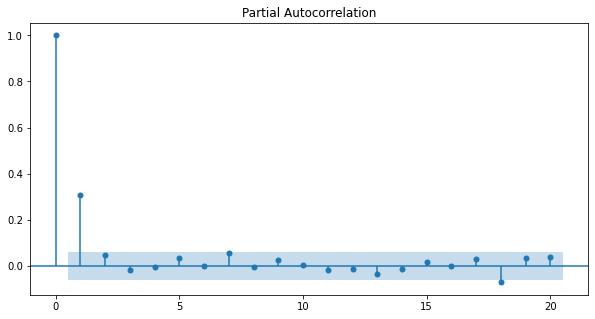

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# AR parameter = +0.3
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20);
# Plot PACF
plot_pacf(simulated_data_1, lags=20);

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20);
# Plot PACF
plot_pacf(simulated_data_2, lags=20);

# Plot 3: AR parameter = 0.3
plot_acf(simulated_data_3, alpha=1, lags=20);
# Plot PACF
plot_pacf(simulated_data_3, lags=20);

# Estimate an ARMA

In [6]:
import warnings
warnings.simplefilter('ignore')
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_3, order=(1, 1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42166D+00    |proj g|=  2.77445D-04

At iterate    5    f=  1.42166D+00    |proj g|=  1.34337D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     13      1     0     0   2.220D-08   1.422D+00
  F =   1.4216630909251287     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observati

 This problem is unconstrained.


In [7]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


# ADF Test

In [8]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

# ADF Test
result = adfuller(simulated_data_1, regression="c", autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -5.317366185642683
n_lags: 5.039869262898188e-06
p-value: 5.039869262898188e-06
Critial Values:
   1%, -3.4435228622952065
Critial Values:
   5%, -2.867349510566146
Critial Values:
   10%, -2.569864247011056


# Trend Sationary

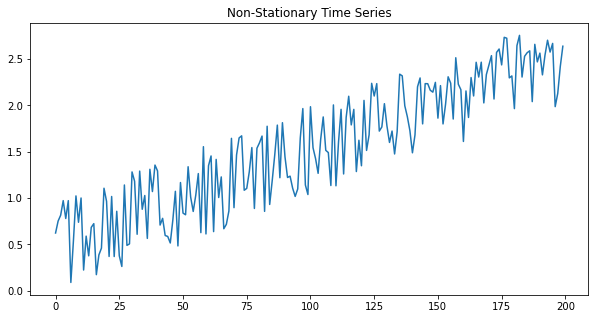

In [12]:
import matplotlib.pyplot as plt
import random
random.seed(5)
non_stationary_series = []
for i in range(0,200):
    non_stationary_series.append(random.random()+(i*.01))
dataset1=non_stationary_series
plt.plot(non_stationary_series)
plt.title('Non-Stationary Time Series')
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

# ADF Test
result = adfuller(dataset1, regression="ct", autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -14.478475871159814
n_lags: 4.513871206748279e-22
p-value: 4.513871206748279e-22
Critial Values:
   1%, -4.004997848936356
Critial Values:
   5%, -3.4327862452981046
Critial Values:
   10%, -3.140144918368515


# Stationary Series

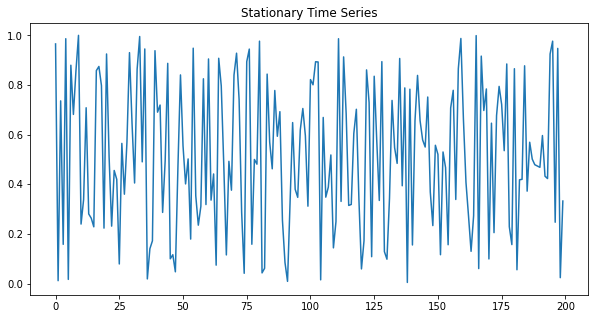

In [14]:
import matplotlib.pyplot as plt
import random
random.seed(15)
stationary_series = []
for i in range(0,200):
    stationary_series.append(random.random())
dataset2=stationary_series    
plt.plot(stationary_series)
plt.title('Stationary Time Series')
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

# ADF Test
result = adfuller(dataset2, regression="ct", autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -7.942436936776488
n_lags: 9.707190179586645e-11
p-value: 9.707190179586645e-11
Critial Values:
   1%, -4.006711675454599
Critial Values:
   5%, -3.433608194523564
Critial Values:
   10%, -3.1406263010660807


# Simulation

In [16]:
# For scientific computing
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
%matplotlib inline

In [18]:
# Define our step probability and number of steps.
step_prob = 0.5  # Can step left or right equally.
n_steps = 1000   # Essentially time.

# Set up a vector to store our positions. 
position = np.zeros(n_steps)  # Full of zeros.

# Loop through each time step.
for i in range(1, n_steps):
    # Flip a coin.
    flip = np.random.rand()
    
    # Figure out which way we should step.
    if flip < step_prob:
        step = -1  # To the 'left'.
    else:
        step = 1  # to the 'right'.
        
    # Update our position based off of where we were in the last time point. 
    position[i] =  position[i-1] + step

Text(0, 0.5, 'position')

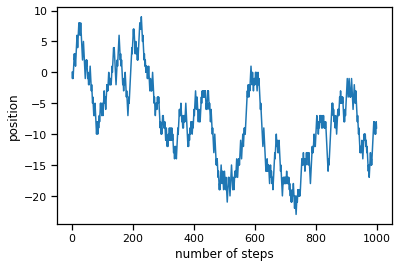

In [19]:
# Make a vector of time points.
steps = np.arange(0, n_steps, 1)  # Arange from 0 to n_steps taking intervals of 1.

# Plot it!
plt.plot(steps, position)
plt.xlabel('number of steps')
plt.ylabel('position')

In [20]:
from random import seed
from random import random
from statsmodels.tsa.stattools import adfuller
# generate random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
# statistical test
result = adfuller(random_walk, regression="ct")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.039043
p-value: 0.580016
Critical Values:
	1%: -3.968
	5%: -3.415
	10%: -3.130


# DF critical values

In [22]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess


#from ARMA import ARMA  # Custom module to simulate series. Can be replaced with statsmodels.
                       # See repository for more details.
repetitions = 1000
models = ['model_a', 'model_b', 'model_c']
series_lengths = [25, 50, 100, 250, 500, 1000]
percentiles = [10, 5, 2.5, 1]

# Creating an empty list for each model and length.
# t_values = {'model_a': {25: [], ...}, 'model_b': {25: [], ...}, ...}
t_values = {model: {series_length: [] for series_length in series_lengths} for model in models}

for series_length in series_lengths:
    for __ in range(repetitions):        

# Plot 1: AR parameter = +0.9
        ar1 = np.array([1, -1])
        ma1 = np.array([1])
        AR_object1 = ArmaProcess(ar1, ma1)
        y = AR_object1.generate_sample(series_length) # y_{t} = y_{t-1} + e_{t}
        
       #y = sm.tsa.arma_generate_sample(1, 0, series_length)
       #y = ARMA.generate_ar(series_length, [1])  # y_{t} = y_{t-1} + e_{t}
        delta_y = np.diff(y)  # delta_y_{t} = y_{t+1} - y_{t}
        alpha = np.ones(series_length)  # alpha = 1
        beta_t = np.arange(series_length)  # beta*t = [0, 1, 2, ...]

        # Model a:
        regressors_a = y[:-1]  # This makes y and delta_y have the same size.
        results_a = sm.OLS(delta_y, regressors_a).fit()
        t_values['model_a'][series_length].append(results_a.tvalues[0])

        # Model b:
        regressors_b = np.column_stack((y, alpha))[:-1]
        results_b = sm.OLS(delta_y, regressors_b).fit()
        t_values['model_b'][series_length].append(results_b.tvalues[0])

        # Model c:
        regressors_c = np.column_stack((y, alpha, beta_t))[:-1]
        results_c = sm.OLS(delta_y, regressors_c).fit()
        t_values['model_c'][series_length].append(results_c.tvalues[0])

# Creating an empty DataFrame to store the critical values.
index = pd.MultiIndex.from_product([models, series_lengths])
df_table = pd.DataFrame(columns=percentiles, index=index)

# Filling the DataFrame.
for model in models:
    for series_length in series_lengths:
        for percentile in percentiles:
            critical_t_value = np.percentile(t_values[model][series_length], percentile)
            df_table.loc[(model, series_length), percentile] = critical_t_value

In [23]:
df_table.astype(float).round(2)

10.0  5.0   2.5   1.0 
model_a 25   -1.49 -1.87 -2.15 -2.45
        50   -1.60 -1.99 -2.39 -2.80
        100  -1.57 -1.84 -2.17 -2.41
        250  -1.66 -2.03 -2.31 -2.57
        500  -1.57 -1.86 -2.11 -2.46
        1000 -1.58 -1.87 -2.14 -2.34
model_b 25   -2.60 -3.00 -3.29 -3.65
        50   -2.61 -2.94 -3.15 -3.52
        100  -2.54 -2.84 -3.13 -3.46
        250  -2.62 -2.93 -3.29 -3.46
        500  -2.54 -2.78 -3.03 -3.27
        1000 -2.60 -2.87 -3.12 -3.45
model_c 25   -3.26 -3.59 -4.04 -4.57
        50   -3.21 -3.52 -3.79 -4.24
        100  -3.16 -3.46 -3.75 -4.06
        250  -3.13 -3.44 -3.71 -3.92
        500  -3.20 -3.44 -3.74 -4.11
        1000 -3.07 -3.34 -3.56 -3.86

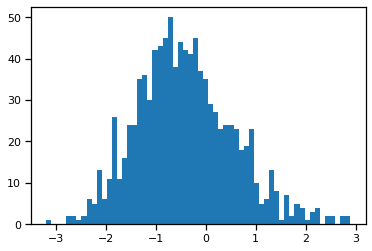

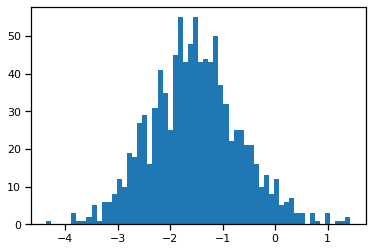

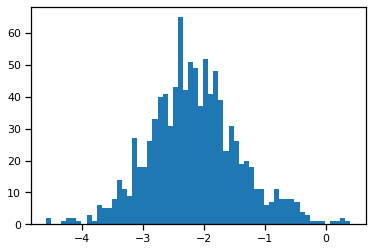

In [27]:
sel_length = 1000

for model_name in models:
    plt.hist(t_values[model_name][sel_length], bins=60)
    plt.show()

# Regression with Nonstationary Variables

In [57]:
%matplotlib inline

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(9876789)

In [60]:
X=simulated_data_1
#X = sm.add_constant(X)
Y=simulated_data_2;
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.533
Model:                            OLS   Adj. R-squared (uncentered):              0.532
Method:                 Least Squares   F-statistic:                              569.4
Date:                Mon, 06 Mar 2023   Prob (F-statistic):                    1.56e-84
Time:                        21:19:44   Log-Likelihood:                         -1914.6
No. Observations:                 500   AIC:                                      3831.
Df Residuals:                     499   BIC:                                      3835.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Empirical Application - Tesla Production and Real Output per Hour 

#import matplotlib.pyplot as plt
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
import statsmodels.api as sm

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [53]:
df = pd.read_csv("/Users/user/Dropbox/Python_Econometrics/TeslaProduction-BusinessProductivity.csv")
df.shape

FileNotFoundError: [Errno 2] No such file or directory: '/Users/user/Dropbox/Python_Econometrics/TeslaProduction-BusinessProductivity.csv'

In [98]:
df.head()

,Date,Tesla Production,Real Output per Hour
0,2012Q3,321,104.503
1,2012Q4,2400,104.059
2,2013Q1,4900,104.304
3,2013Q2,5150,104.147
4,2013Q3,5500,104.570


In [99]:
df.tail()

,Date,Tesla Production,Real Output per Hour
18,2017Q1,25000,107.683
19,2017Q2,22000,108.142
20,2017Q3,26150,108.849
21,2017Q4,29870,108.943
22,2018Q1,29980,109.050


In [102]:
fig0 = df.iplot(
    columns=['Tesla Production','Real Output per Hour'], 
    asFigure=True, 
    kind='scatter', 
    showlegend=False,
    colors = {'Real Output per Hour':'#ff0074',
              'Tesla Production':'#1b073a'},
    title='Distributions',
    yTitle='Frequency',
    subplots=True,
    shape=(2,1),
    subplot_titles = True,
    x='Date'
    )

iplot(fig0)

df.describe()

In [101]:
y0 = df['Tesla Production']
y1 = df['Real Output per Hour']

trace0 = go.Box(
    y=y0,
    name = 'Tesla Production',
    marker = dict(
        color = '#1b073a',
        )
    )
trace1 = go.Box(
    y=y1,
    name = 'Real Output per Hour',
    marker = dict(
        color = '#ff0074',
        )
    )
layout = go.Layout(
            title = 'Broken Box Plots'
        )

data = [trace0, trace1]

fig = dict(data=data, layout=layout)

iplot(fig)

# Does Real Output per Hour explain Tesla Production

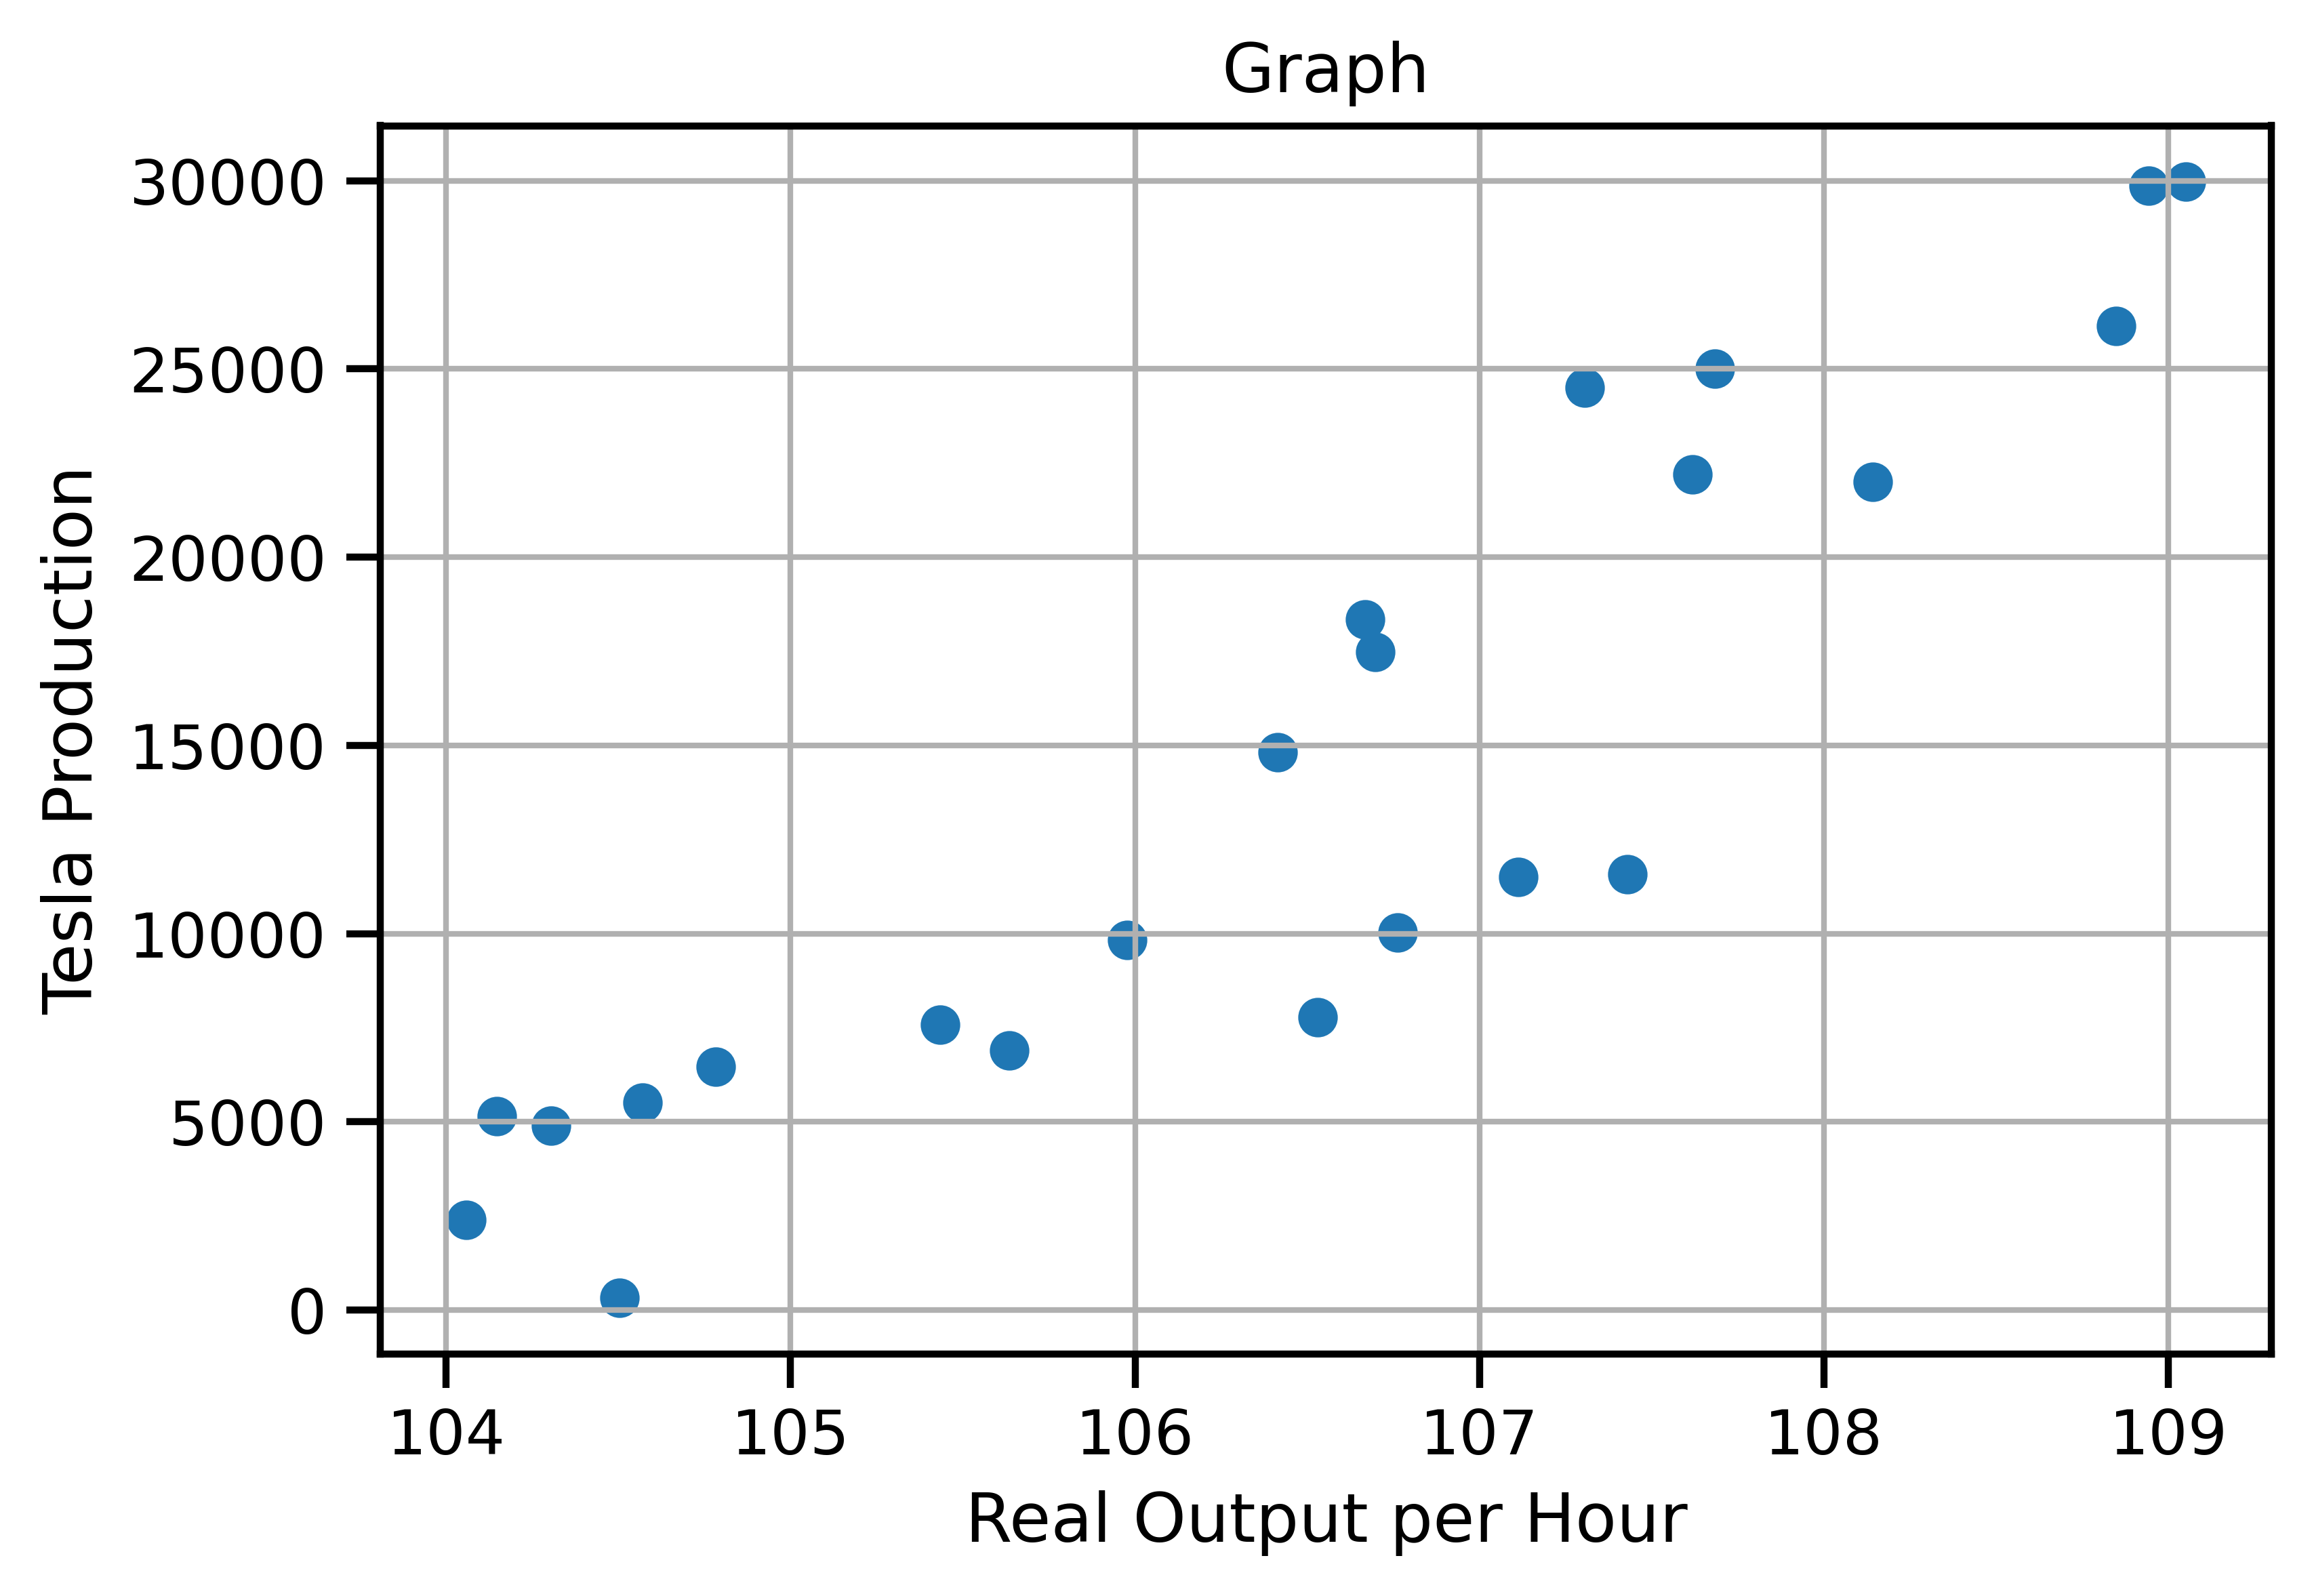

In [105]:
plt.figure(2, dpi=600)

plt.scatter(df['Real Output per Hour'], df['Tesla Production'])

plt.xlabel('Real Output per Hour')
plt.ylabel('Tesla Production')
plt.title('Graph')
plt.grid(True)

plt.show()

In [117]:
import warnings
warnings.simplefilter('ignore')

ROpH=sm.add_constant(df['Real Output per Hour'])
model = sm.OLS(df['Tesla Production'],ROpH)
results = model.fit()
df['Fitted Values']=results.fittedvalues
df['Residuals']=results.resid
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Tesla Production   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     106.6
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           1.10e-09
Time:                        11:26:06   Log-Likelihood:                -221.13
No. Observations:                  23   AIC:                             446.3
Df Residuals:                      21   BIC:                             448.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.511e+05 

In [107]:
fig0 = df.iplot(
    columns=['Tesla Production', 'Real Output per Hour', 'Fitted Values', 'Residuals'], 
    asFigure=True, 
    kind='scatter', 
    colors = {'Real Output per Hour':'#ff0074',
          'Tesla Production':'#1b073a',
          'Fitted Values': 'black',
          'Residuals': 'red',
         },
    x='Date',
    title='OLS Fitted Values Comparison',
    subplots= True,
    shape = (2,2),
    subplot_titles = True,
    )

iplot(fig0)

In [109]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

# ADF Test
result = adfuller(y0, regression="c", autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: 1.8929779505521465
n_lags: 0.9985166374448209
p-value: 0.9985166374448209
Critial Values:
   1%, -4.068853732362312
Critial Values:
   5%, -3.1271488757396453
Critial Values:
   10%, -2.7017297633136095


In [110]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

# ADF Test
result = adfuller(y1, regression="c", autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -3.2652111023268806
n_lags: 0.07217298347186284
p-value: 0.07217298347186284
Critial Values:
   1%, -4.441609162283997
Critial Values:
   5%, -3.632984327573253
Critial Values:
   10%, -3.2547885800150262


# Cointegration

In [115]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import adfuller

ols1 = sm.OLS.from_formula('y0~y1',data=df).fit()
resid1 = ols1.resid    

# test for the unit roots in residuals (null hypothesis)
aeg_test = adfuller(resid1,regression='nc',autolag='AIC',store=True)
aeg_test
print(aeg_test[-1].resols.summary())

def coint_output(res):
    output = pd.Series([res[0],res[1],res[2][0],res[2][1],res[2][2]],
                        index=['Test Statistic','p-value','Critical Value (1%)',
                               'Critical Value (5%)','Critical Value (10%)'])
    print(output) 

    # test for no cointegration (null hypothesis)
# default method='aeg', autolag='AIC'
# using the critical values of MacKinnon    
# there is no regression results yet
coint_test1 = coint(y0, y1, trend='ct', autolag='AIC') 
coint_test1
coint_test2 = coint(y0, y1, trend='c', autolag='AIC') 
coint_test2
coint_output(coint_test2)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.272
Model:                            OLS   Adj. R-squared (uncentered):              0.237
Method:                 Least Squares   F-statistic:                              7.831
Date:                Tue, 15 Feb 2022   Prob (F-statistic):                      0.0108
Time:                        11:22:48   Log-Likelihood:                         -208.89
No. Observations:                  22   AIC:                                      419.8
Df Residuals:                      21   BIC:                                      420.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [50]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv("http://web.pdx.edu/~crkl/ceR/data/usyc87.txt",index_col='YEAR',sep='\s+',nrows=66)
y = data['Y']
c = data['C']

from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import adfuller

ols1 = sm.OLS.from_formula('C~Y',data=data).fit()
resid1 = ols1.resid    

# test for the unit roots in residuals (null hypothesis)
aeg_test = adfuller(resid1,regression='nc',autolag='AIC',store=True)
aeg_test
print(aeg_test[-1].resols.summary())

def coint_output(res):
    output = pd.Series([res[0],res[1],res[2][0],res[2][1],res[2][2]],
                        index=['Test Statistic','p-value','Critical Value (1%)',
                               'Critical Value (5%)','Critical Value (10%)'])
    print(output) 

# test for no cointegration (null hypothesis)
# default method='aeg', autolag='AIC'
# using the critical values of MacKinnon    
# there is no regression results yet
coint_test1 = coint(c, y, trend='ct', autolag='AIC') 
coint_test1
coint_test2 = coint(c, y, trend='c', autolag='AIC') 
coint_test2
coint_output(coint_test2)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.207
Model:                            OLS   Adj. R-squared (uncentered):              0.168
Method:                 Least Squares   F-statistic:                              5.235
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                     0.00282
Time:                        14:43:42   Log-Likelihood:                         -293.75
No. Observations:                  63   AIC:                                      593.5
Df Residuals:                      60   BIC:                                      599.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------